
Attaching package: 'spectralGraphTopology'


The following object is masked from 'package:stats':

    D


Warning message:
"package 'clusterSim' was built under R version 4.5.1"
Loading required package: cluster

Loading required package: MASS

Warning message:
"package 'igraph' was built under R version 4.5.1"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message:
"`get.edgelist()` was deprecated in igraph 2.0.0.
ℹ Please use `as_edgelist()` instead."


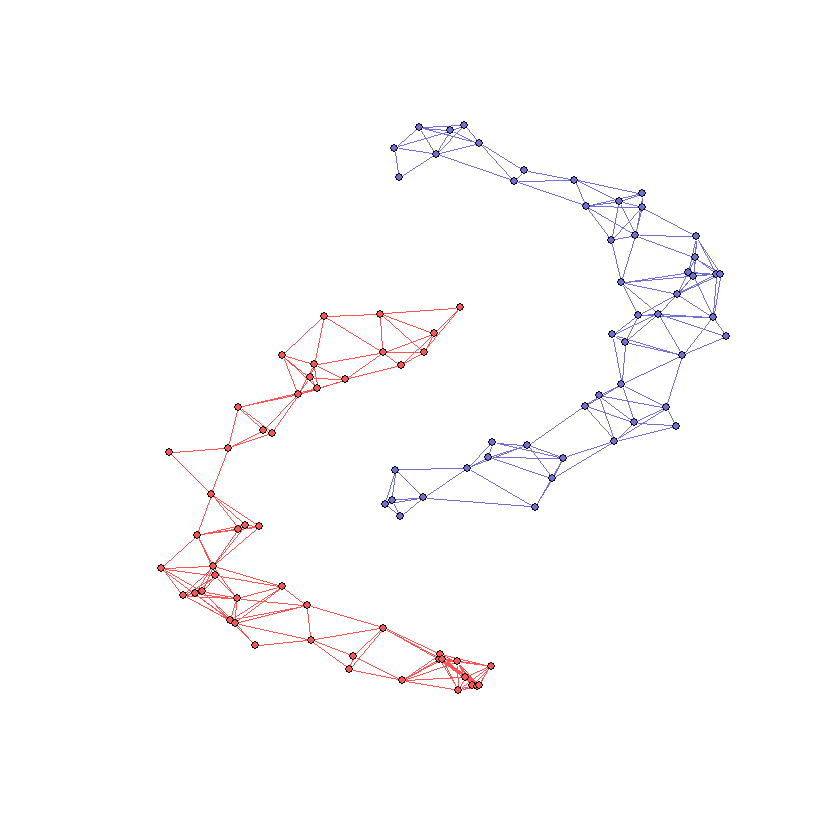

In [1]:
library(spectralGraphTopology)
library(clusterSim)
library(igraph)
set.seed(42)

# generate graph and data
n <- 50  # number of nodes per cluster
twomoon <- clusterSim::shapes.two.moon(n)  # generate data points
k <- 2  # number of components

# estimate underlying graph
S <- crossprod(t(twomoon$data))
graph <- learn_k_component_graph(S, k = k, beta = .25, verbose = FALSE, abstol = 1e-3)

# plot
# build network
net <- igraph::graph_from_adjacency_matrix(graph$adjacency, mode = "undirected", weighted = TRUE)
# colorify nodes and edges
colors <- c("#706FD3", "#FF5252")
V(net)$cluster <- twomoon$clusters
E(net)$color <- apply(as.data.frame(get.edgelist(net)), 1,
                      function(x) ifelse(V(net)$cluster[x[1]] == V(net)$cluster[x[2]],
                                        colors[V(net)$cluster[x[1]]], '#000000'))
V(net)$color <- colors[twomoon$clusters]
# plot nodes
plot(net, layout = twomoon$data, vertex.label = NA, vertex.size = 3)